In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

Load and preprocess the CIFAR-10 dataset

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
y_train = y_train.reshape(-1,) #convert to 1D array
y_test = y_test.reshape(-1,)

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to the range [0, 1]

Define the network architecture

In [17]:
ffnn = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 input images
    Dense(256, activation='relu'),    # First hidden layer with ReLU activation
    Dense(128, activation='relu'),    # Second hidden layer with ReLU activation
    Dense(10, activation='softmax')    # Output layer with softmax activation for classification
])
ffnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
fitted = ffnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8752 - accuracy: 0.3269 - val_loss: 1.9166 - val_accuracy: 0.3037
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6900 - accuracy: 0.4024 - val_loss: 1.6475 - val_accuracy: 0.4082
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6105 - accuracy: 0.4309 - val_loss: 1.6024 - val_accuracy: 0.4349
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5522 - accuracy: 0.4520 - val_loss: 1.5567 - val_accuracy: 0.4482
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5111 - accuracy: 0.4654 - val_loss: 1.5143 - val_accuracy: 0.4576
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4722 - accuracy: 0.4798 - val_loss: 1.4615 - val_accuracy: 0.4818
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4438 - accuracy: 0.4887 - val_loss: 1.4883 - val_ac

Evaluate the network

In [ ]:
test_loss, test_acc = ffnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 1.4206 - accuracy: 0.4960
Test accuracy: 49.60%


Plot the training loss and accuracy

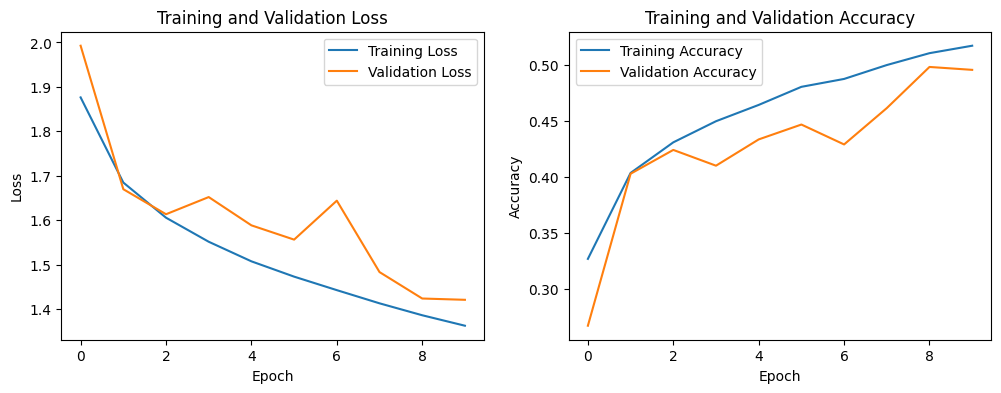

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()